In [45]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import linregress

In [46]:
#Reading Data
file_path = 'Resources/Clean_EV_Data.csv'
df = pd.read_csv(file_path)
ev_path = 'Resources/Clean_EV_Data.csv'
ev_df = pd.read_csv(ev_path)
census_path = 'Resources/2022_census.txt'
cen_df = pd.read_csv(census_path)
population_file_path = 'Resources/zipcode_population.csv'
population_df = pd.read_csv(population_file_path)
charging_station_file_path = 'Resources/charging_stations(2022).csv'
cs_df = pd.read_csv(charging_station_file_path)

In [47]:
# merge census and EV data in order to compute regression and relationships
cen_df = cen_df.rename(columns={'WA Zipcode':'Postal Code'})
ev_cen = cen_df.merge(ev_df, on='Postal Code').reset_index()
# clean dataframe to include only the columns we are working with
clean_merged_df = ev_cen[['Census Year',
                          'Postal Code',
                          'Population',
                          'Median Household Income',
                          'Income Per Capita',
#                           'County',
                          'Make',
                          'Model',
                          'Electric Vehicle Type']]
clean_merged_df

clean_merged_df = clean_merged_df[['Postal Code','Income Per Capita']]
income_df = clean_merged_df.drop_duplicates()
income_df

,Postal Code,Income Per Capita
0,98901,25237.0
69,98237,31650.0
90,98201,41730.0
340,98021,67017.0
1496,98203,44288.0
...,...,...
112241,99131,31798.0
112242,99348,32056.0
112243,98336,30549.0
112244,98935,18814.0


In [48]:
#Merging Data Frames
charging_station_by_population_df = pd.merge(cs_df,population_df)
charging_station_by_population_df

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent
0,98052,27,45,77324,2916,3.771145
1,98033,20,77,40425,2059,5.093383
2,98004,116,86,39161,2001,5.109675
3,98115,6,20,54457,1880,3.452265
4,98006,14,115,39753,1852,4.658768
...,...,...,...,...,...,...
491,98263,0,468,178,1,0.561798
492,98326,0,472,1066,1,0.093809
493,98283,2,473,466,1,0.214592
494,98530,0,474,558,1,0.179211


In [49]:
#Calculating Charging Stations per Capita
charging_station_by_population_df['Charging Stations/Capita'] = (charging_station_by_population_df['Number of Charging Stations']/charging_station_by_population_df['Population'])*100

charging_station_by_population_df
charging_station_by_population_df.sort_values(by='Charging Stations/Capita', ascending=False)

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent,Charging Stations/Capita
479,98164,13,378,239,1,0.418410,5.439331
182,98134,24,344,852,158,18.544601,2.816901
430,98288,3,384,180,3,1.666667,1.666667
469,98575,1,479,134,1,0.746269,0.746269
374,98345,2,37,284,8,2.816901,0.704225
...,...,...,...,...,...,...,...
327,98828,0,365,2075,18,0.867470,0.000000
328,98925,0,407,533,17,3.189493,0.000000
331,99036,0,332,1546,16,1.034929,0.000000
332,98635,0,413,1975,16,0.810127,0.000000


In [50]:
#Merging with Income Data
merged_income_df = pd.merge(charging_station_by_population_df,income_df,on='Postal Code',how='outer')
merged_income_df
#Removing Outliers
merged_income_df_filtered = merged_income_df[merged_income_df['Charging Stations/Capita']<1.5]
merged_income_df_filtered = merged_income_df_filtered[merged_income_df_filtered['Population Percent']<15]
merged_income_df_filtered = merged_income_df_filtered[merged_income_df_filtered['Income Per Capita']<200000]
merged_income_df_filtered = merged_income_df_filtered[merged_income_df_filtered['Number of Charging Stations']<100]

merged_income_df_filtered

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent,Charging Stations/Capita,Income Per Capita
0,98052,27,45,77324,2916,3.771145,0.034918,82929.0
1,98033,20,77,40425,2059,5.093383,0.049474,102001.0
3,98115,6,20,54457,1880,3.452265,0.011018,80879.0
4,98006,14,115,39753,1852,4.658768,0.035217,84234.0
5,98012,2,106,75555,1850,2.448547,0.002647,58143.0
...,...,...,...,...,...,...,...,...
491,98263,0,468,178,1,0.561798,0.000000,38803.0
492,98326,0,472,1066,1,0.093809,0.000000,23750.0
493,98283,2,473,466,1,0.214592,0.429185,21288.0
494,98530,0,474,558,1,0.179211,0.000000,21641.0


In [51]:
#Top 10 Richest Zipcodes
#Filtering to top 10 Income Per Capita
richest_df_filtered = merged_income_df_filtered.nlargest(10,columns=['Income Per Capita'])
richest_df_filtered

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent,Charging Stations/Capita,Income Per Capita
138,98039,0,153,2923,242,8.279165,0.000000,156124.0
19,98112,3,65,23456,1110,4.732265,0.012790,118391.0
7,98040,11,60,25464,1639,6.436538,0.043198,113575.0
64,98121,99,112,20562,545,2.650520,0.481471,110372.0
20,98109,82,134,32251,1089,3.376639,0.254256,104635.0
84,98101,45,97,16302,428,2.625445,0.276040,104261.0
307,98940,0,308,409,26,6.356968,0.000000,102459.0
1,98033,20,77,40425,2059,5.093383,0.049474,102001.0
60,98102,8,54,25827,594,2.299919,0.030975,99103.0
11,98075,5,59,25202,1330,5.277359,0.019840,96356.0


In [52]:
#Top 10 Charging Stations per Capita
#Filtering by highest percentage of charging stations per capita in a zipcode
charging_df_filtered = merged_income_df_filtered.nlargest(10,columns=['Charging Stations/Capita'])
charging_df_filtered

,Postal Code,Number of Charging Stations,Unnamed: 0,Population,Electric Vehicle Type,Population Percent,Charging Stations/Capita,Income Per Capita
469,98575,1,479,134,1,0.746269,0.746269,34128.0
374,98345,2,37,284,8,2.816901,0.704225,63531.0
346,98833,1,451,153,14,9.150327,0.653595,46305.0
64,98121,99,112,20562,545,2.650520,0.481471,110372.0
392,98304,4,421,925,6,0.648649,0.432432,34367.0
493,98283,2,473,466,1,0.214592,0.429185,21288.0
351,98068,2,358,528,13,2.462121,0.378788,63853.0
448,98314,5,456,1565,2,0.127796,0.319489,30452.0
58,98104,47,165,15052,609,4.045974,0.312251,53546.0
84,98101,45,97,16302,428,2.625445,0.276040,104261.0


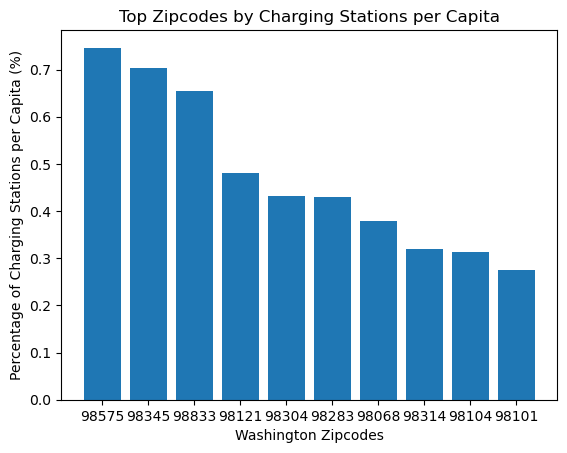

In [53]:
#Highest Percentage of Charging Stations per Capita Bar Graph
high_percent_zipcodes_x = ['98575','98345','98833','98121','98304',
                   '98283','98068','98314','98104','98101']
top_population_percent_y = [0.746269,0.704225,0.653595,0.481471,0.432432,
                        0.429185,0.378788,0.319489,0.312251,0.276040]

plt.bar(high_percent_zipcodes_x,top_population_percent_y)
plt.title("Top Zipcodes by Charging Stations per Capita")
plt.xlabel('Washington Zipcodes')
plt.ylabel('Percentage of Charging Stations per Capita (%)')

plt.savefig('Graphs/bar_top_charging_stations.png')

plt.show()

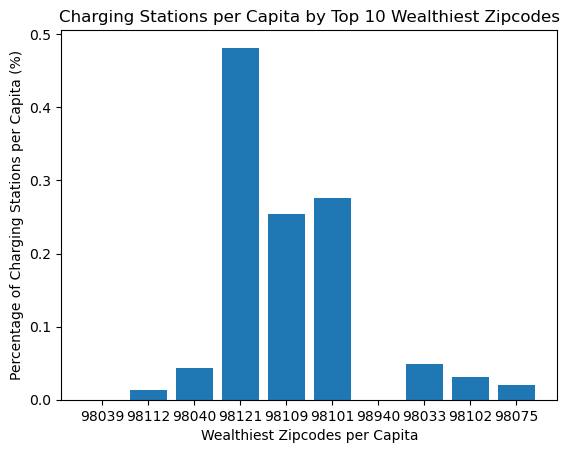

In [54]:
#Richest Zipcodes - Charging Stations Bar Graph
rich_zipcodes_x = ['98039','98112','98040','98121','98109',
                   '98101','98940','98033','98102','98075']
rich_charging_per_capita_y = [0.000000,0.012790,0.043198,0.481471,0.254256,
                        0.276040,0.000000,0.049474,0.030975,0.019840]

plt.bar(rich_zipcodes_x,rich_charging_per_capita_y)
plt.title("Charging Stations per Capita by Top 10 Wealthiest Zipcodes")
plt.xlabel('Wealthiest Zipcodes per Capita')
plt.ylabel('Percentage of Charging Stations per Capita (%)')

plt.savefig('Graphs/bar_wealthy_charging_stations.png')

plt.show()

The r-value is 0.35


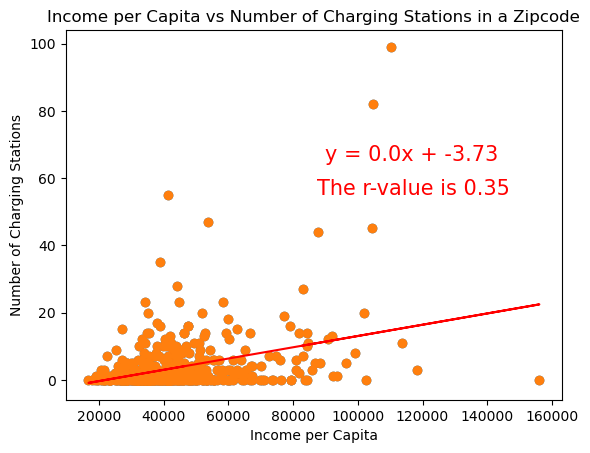

In [55]:
#Scatterplot - Total Charging Stations vs Income per Capita
plt.scatter(merged_income_df_filtered['Income Per Capita'],
            merged_income_df_filtered['Number of Charging Stations'])

x_values = merged_income_df_filtered['Income Per Capita']
y_values = merged_income_df_filtered['Number of Charging Stations']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
rvalue = str(round(rvalue, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, '-r')
plt.annotate(line_eq,(90000,65), fontsize=15, color='red')
plt.annotate(f'The r-value is {rvalue}',(87500,55), fontsize=15, color='red')
plt.title("Income per Capita vs Number of Charging Stations in a Zipcode")
plt.xlabel('Income per Capita')
plt.ylabel('Number of Charging Stations')
print(f'The r-value is {rvalue}')
plt.savefig('Graphs/scatter_income_charging_stations.png')